In [1]:
%matplotlib inline

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from flamme import plot
from flamme.plot.utils import readable_xticklabels
from flamme.section.continuous_drift import create_temporal_drift_figure

In [3]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
random_seed = 15803713921897248048
rng = np.random.default_rng()

## plot_cdf

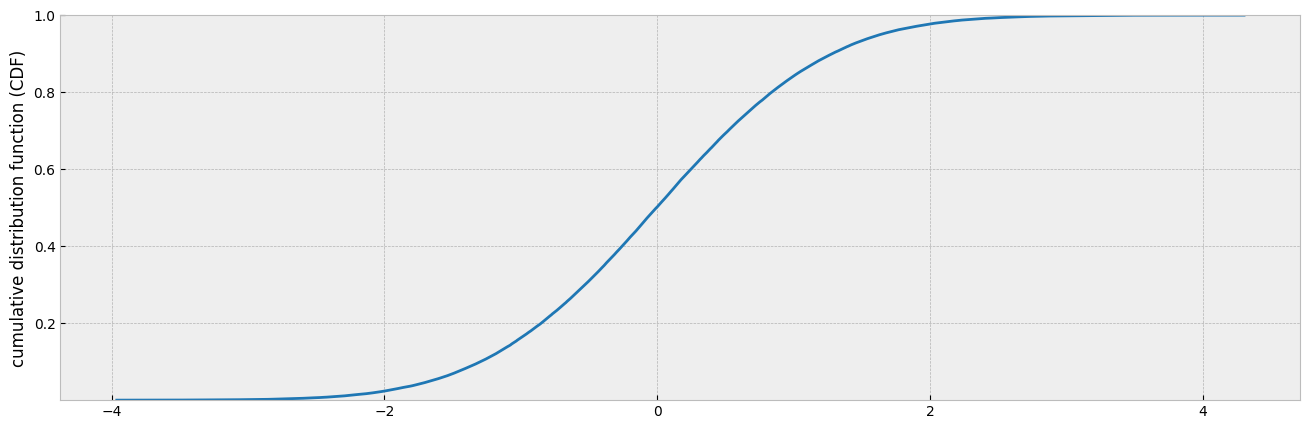

In [5]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.plot_cdf(ax=ax, array=array)

## hist_continuous

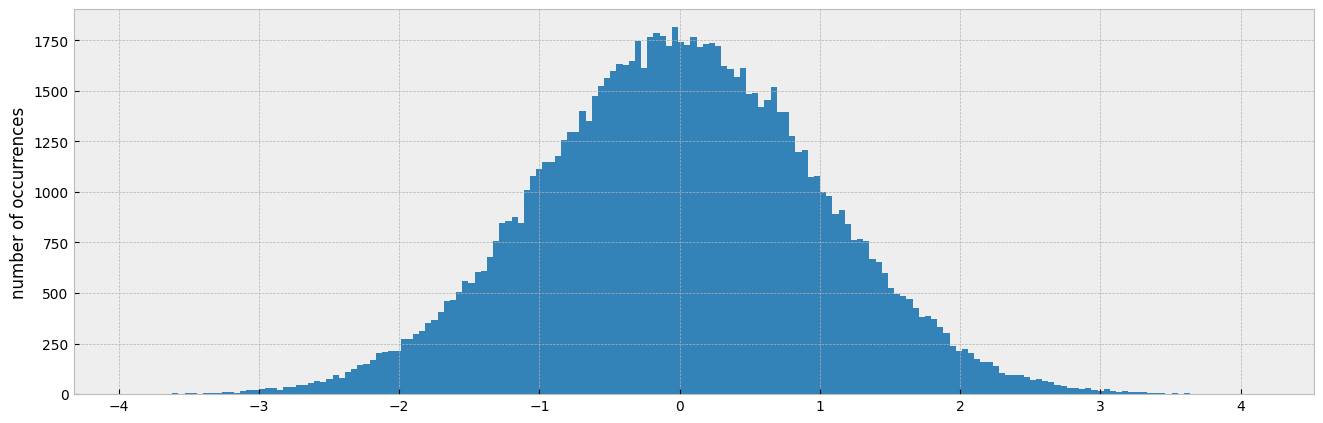

In [6]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201, cdf=False, quantile=False)

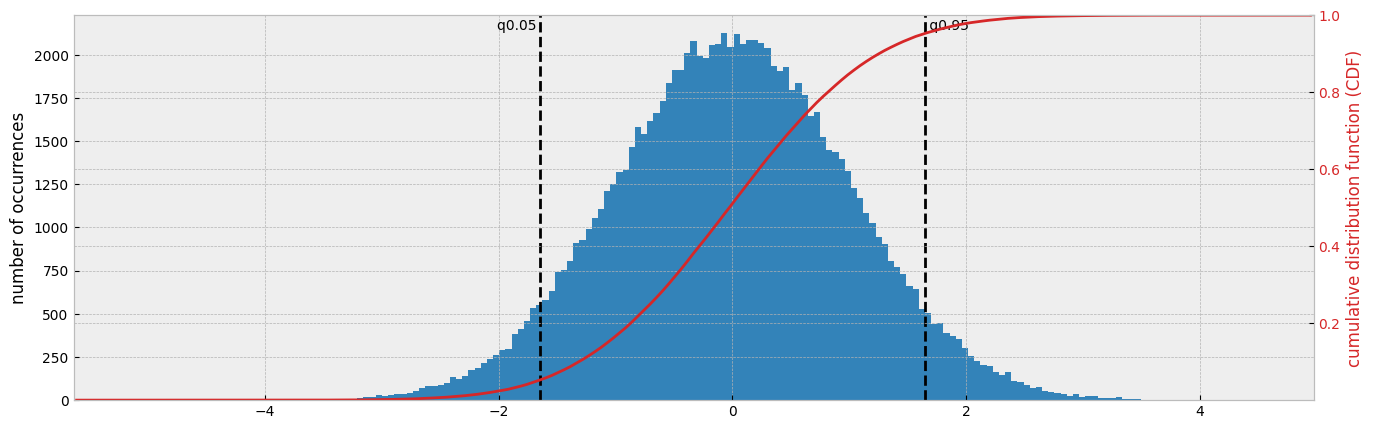

In [7]:
fig, ax = plt.subplots()
array = rng.standard_normal(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201)

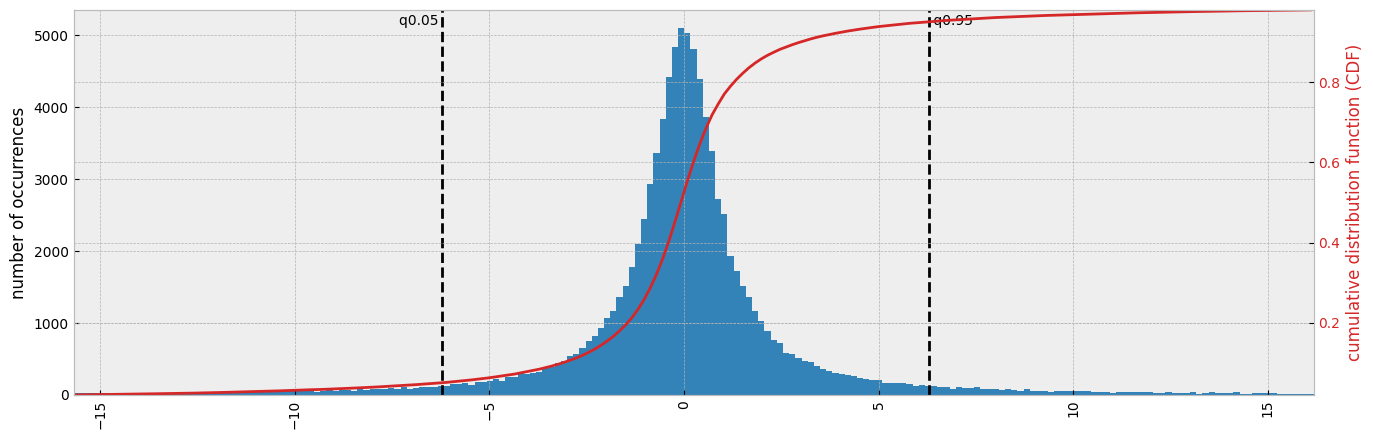

In [8]:
fig, ax = plt.subplots()
array = rng.standard_cauchy(100000)
plot.hist_continuous(ax=ax, array=array, nbins=201, xmin="q0.02", xmax="q0.98")

## hist_continuous2

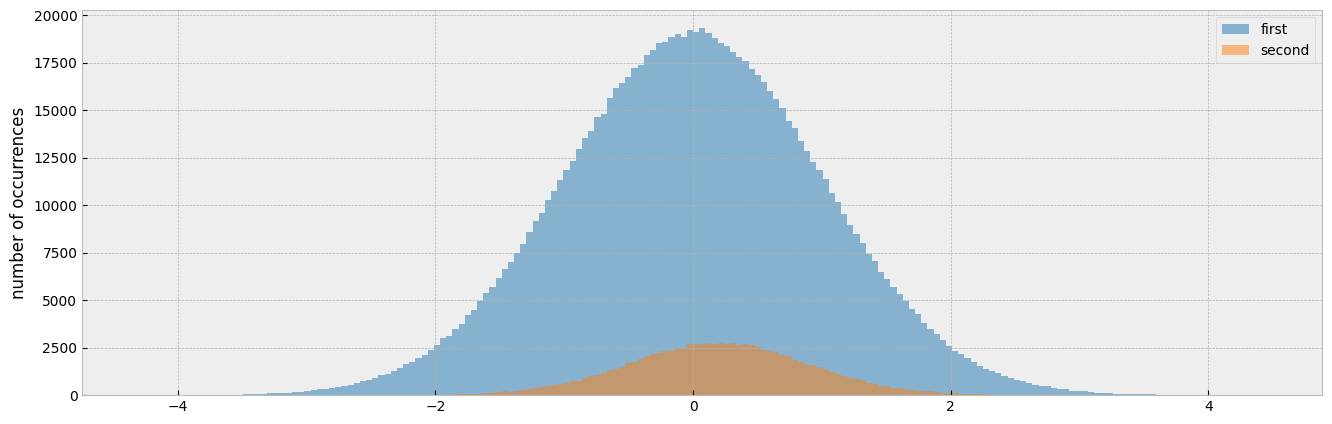

In [9]:
fig, ax = plt.subplots()
array1 = rng.standard_normal(1000000)
array2 = rng.standard_normal(100000) * 0.7 + 0.2
plot.hist_continuous2(ax=ax, array1=array1, array2=array2, nbins=201)

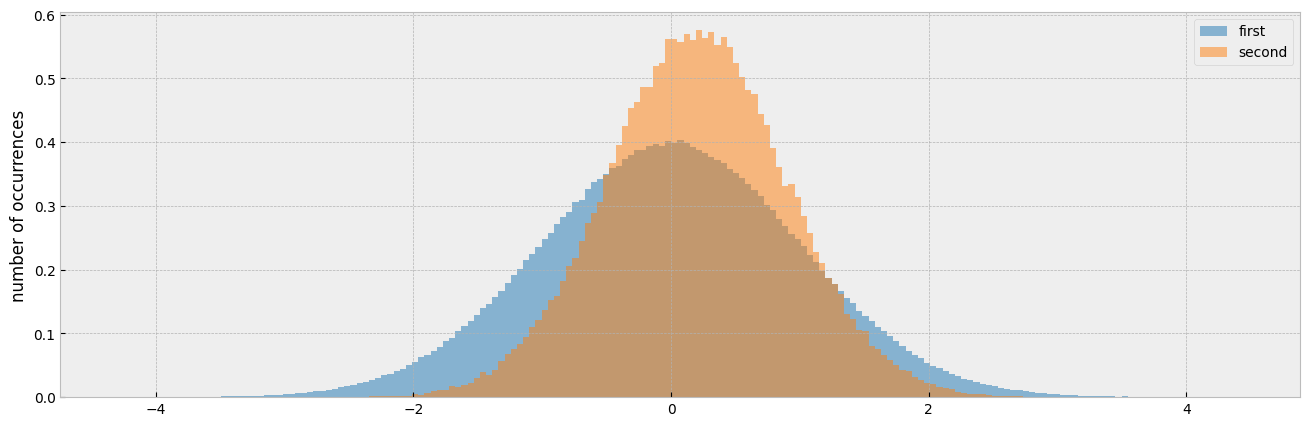

In [10]:
fig, ax = plt.subplots()
plot.hist_continuous2(ax=ax, array1=array1, array2=array2, nbins=201, density=True)

## plot_null_temporal

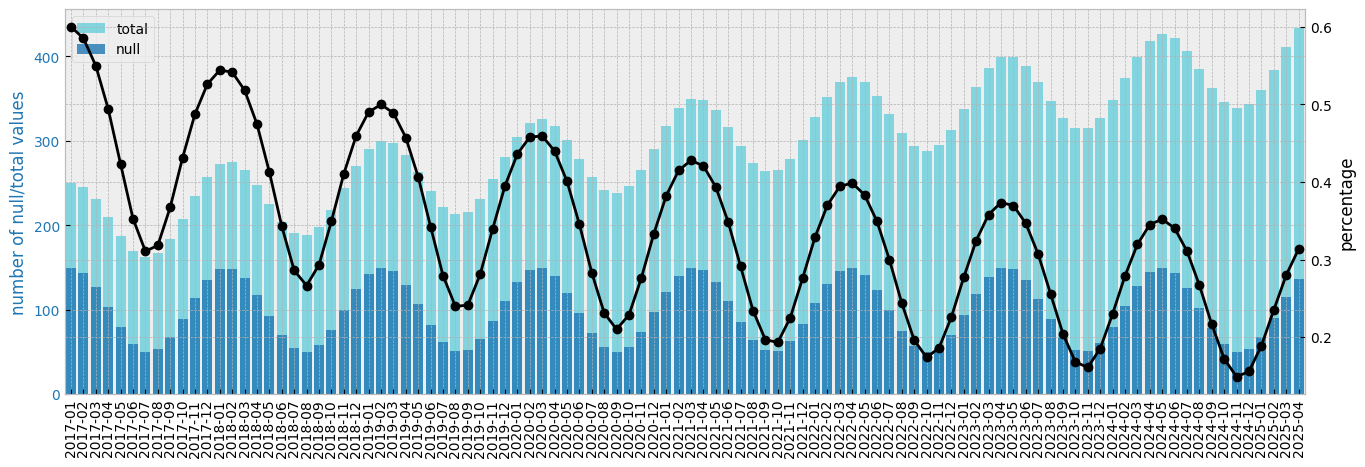

In [11]:
n = 100
values = list(range(n))
nulls = [math.cos(x * 0.5) * 50 + 100 for x in values]
totals = [math.cos(x * 0.5) * 50 + 200 + 2 * x for x in values]
labels = pd.period_range(start="2017-01-01", periods=n, freq="M")

fig, ax = plt.subplots()
plot.plot_null_temporal(ax=ax, nulls=nulls, totals=totals, labels=labels)
readable_xticklabels(ax)

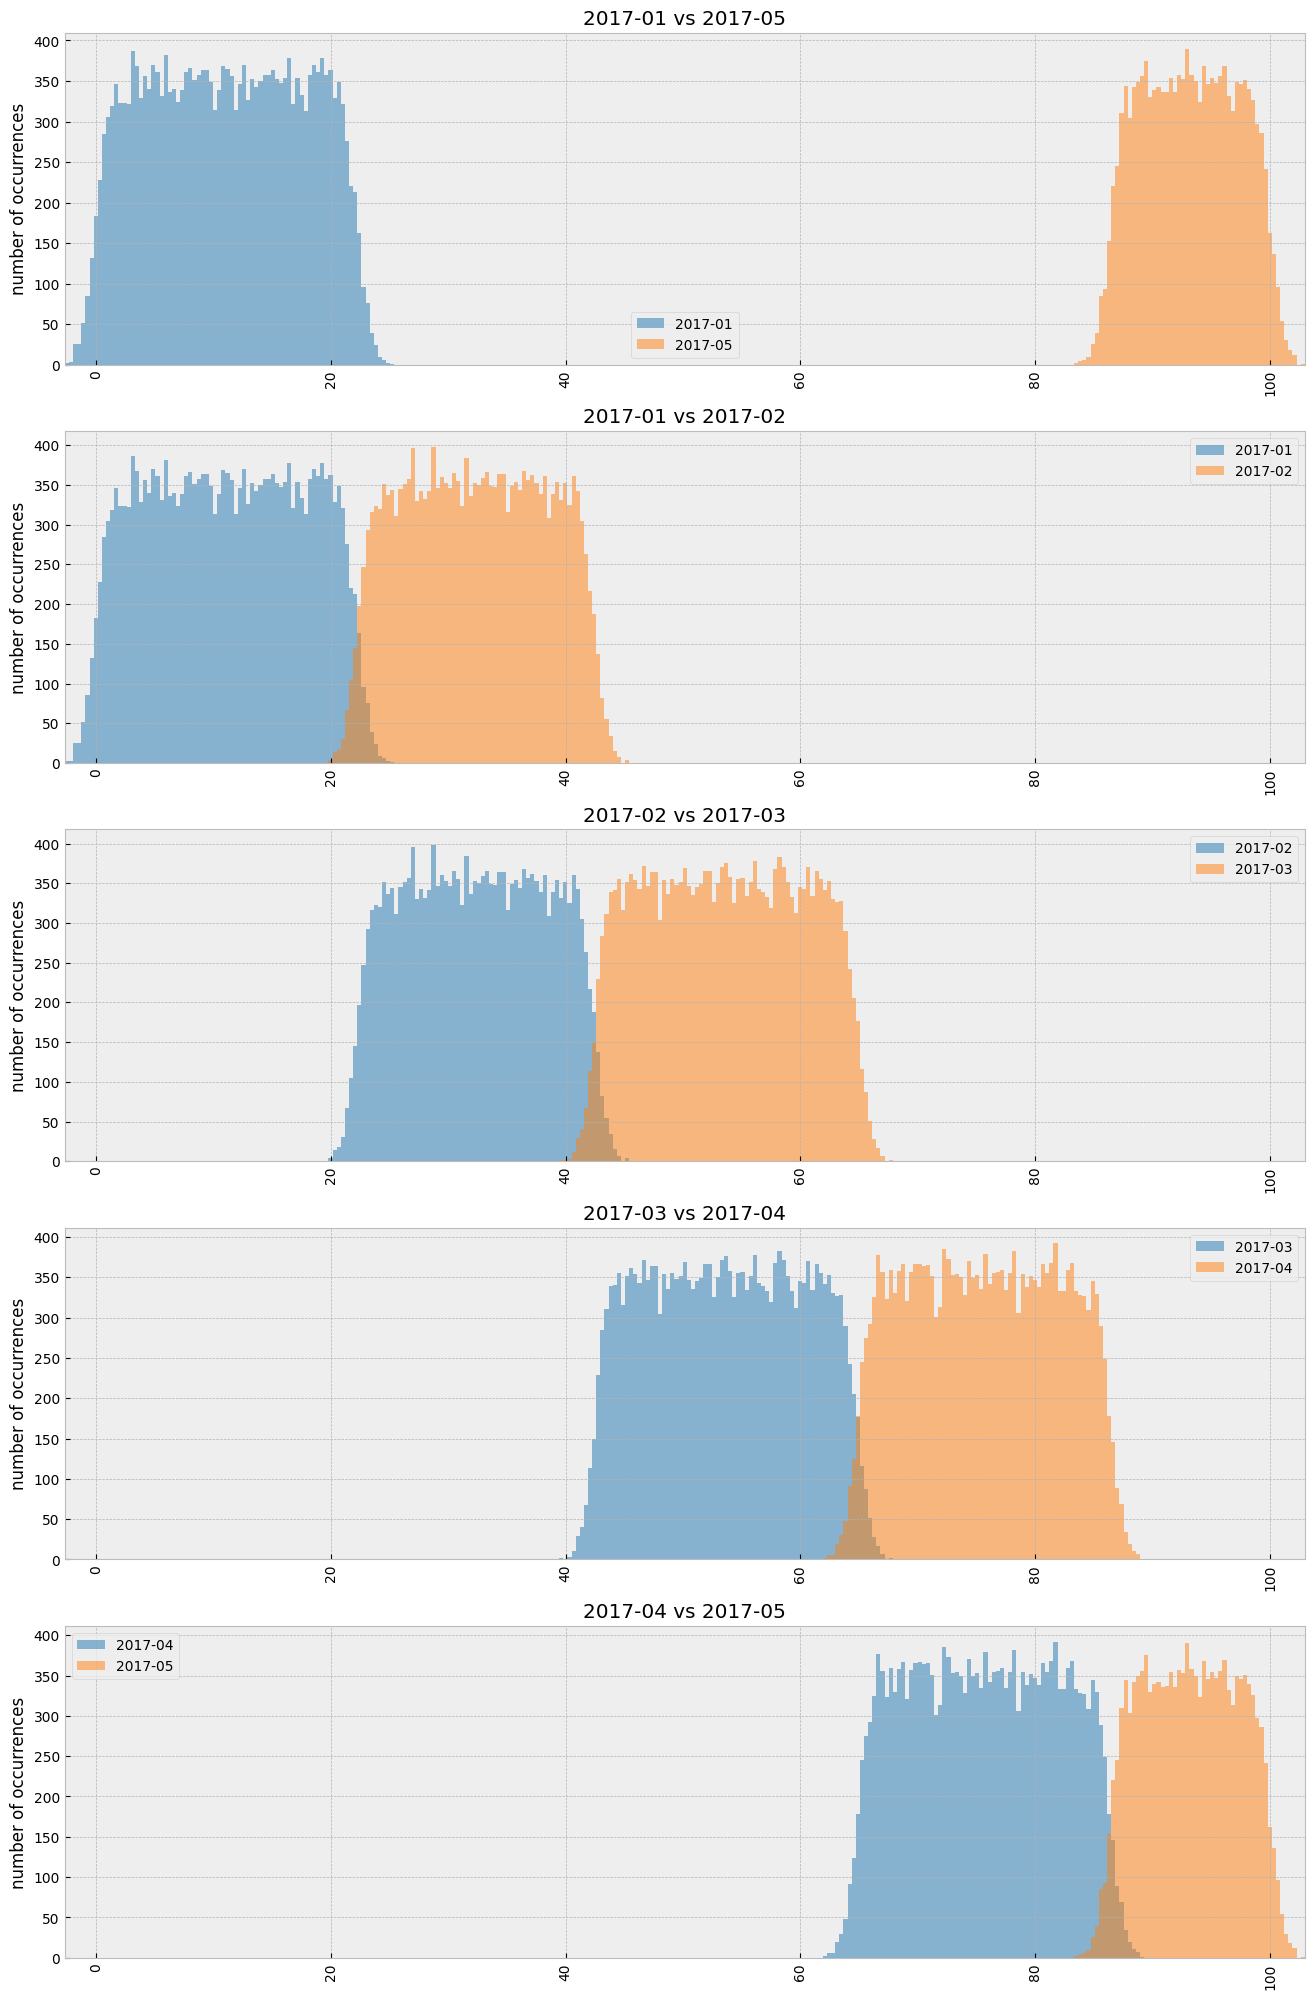

In [13]:
n = 100000
values = rng.standard_normal(n) + np.arange(n) * 0.001
frame = pd.DataFrame(
    {
        "value": values,
        "date": pd.date_range(start="2017-01-01", periods=n, freq="2min"),
    }
)
_ = create_temporal_drift_figure(
    frame, column="value", dt_column="date", period="M", figsize=(16, 5), nbins=301
)